# Insurance Claimants Classification using Decision Tree 

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score, classification_report

In [2]:
# loading the dataset
df = pd.read_csv("E:\Datas\claimants.csv")
df.head(10)

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
5,97,0,1.0,1.0,0.0,35.0,0.309
6,10,0,0.0,1.0,0.0,9.0,3.538
7,36,0,1.0,1.0,0.0,34.0,4.881
8,51,1,1.0,1.0,0.0,60.0,0.874
9,55,1,0.0,1.0,0.0,NaN,0.350


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [4]:
# Checking for null values
df.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [5]:
# Using simple imputer to fill null values
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the numerical columns
df['CLMAGE'] = numerical_imputer.fit_transform(df[['CLMAGE']])

# Fit and transform the categorical columns
df[['CLMSEX', 'SEATBELT', 'CLMINSUR']] = categorical_imputer.fit_transform(df[['CLMSEX', 'SEATBELT','CLMINSUR']])

In [6]:
df.isnull().sum()

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

#### We have now filled the missing values. i have used simple imputer here. For numerical columns used median and for categorical used mode i.e. most frequent.

In [7]:
# Label encoding for binary columns
label_encoder = LabelEncoder()
df[['ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT']] = df[['ATTORNEY', 'CLMSEX', 'CLMINSUR', 'SEATBELT']].apply(label_encoder.fit_transform)


#### I used label encoding here because all the categorical columns were binary

#### Now lets check for outliers

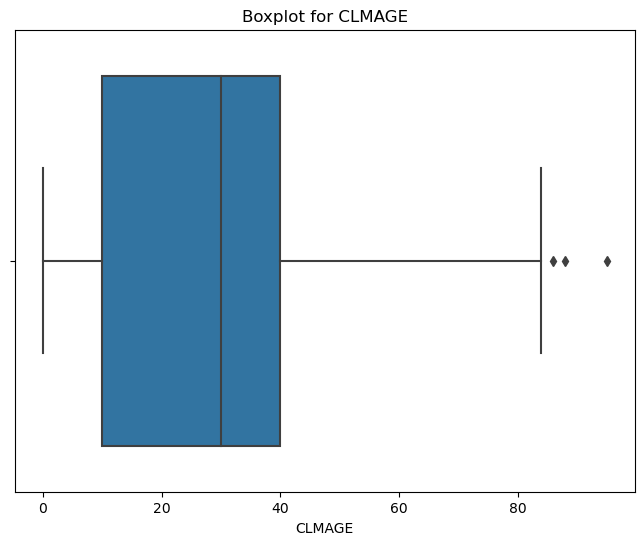

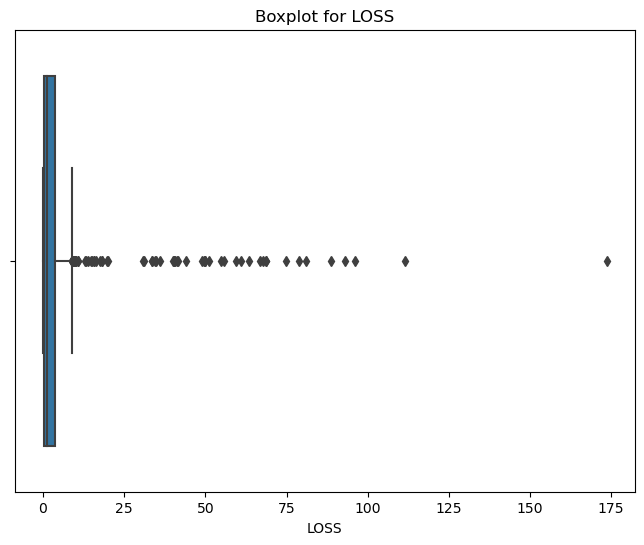

In [8]:
# Checking for outliers
numerical_columns = ['CLMAGE', 'LOSS']

for column in numerical_columns:
    # Plot boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

#### The boxplot clearly shows outliers. Lets now use Isolation forest here for outlier detection.

In [9]:
# Isolation Forest for outlier detection
outlier_detector = IsolationForest(contamination=0.05)
df['outlier'] = outlier_detector.fit_predict(df[['CLMAGE', 'LOSS']])
df = df[df['outlier'] == 1].drop(columns=['outlier'])

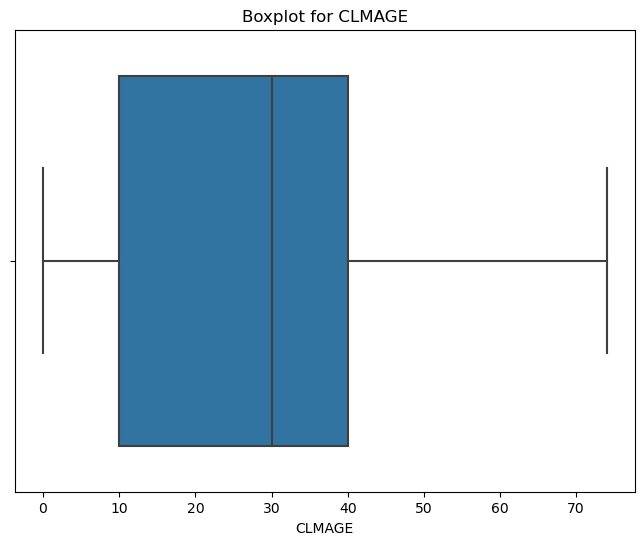

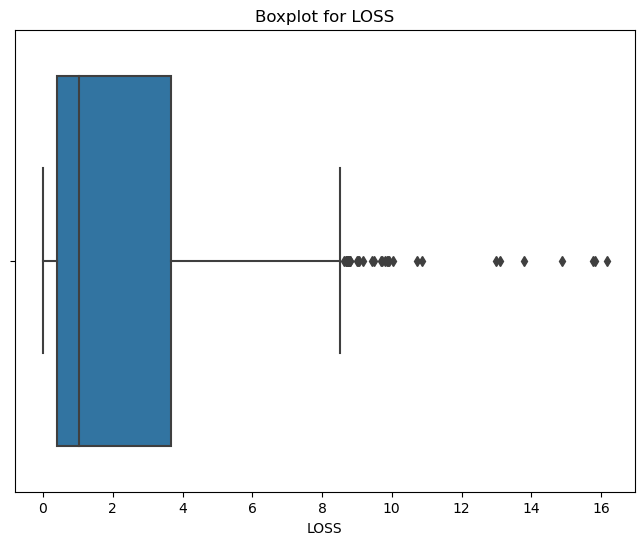

In [10]:
# Checking for outliers
numerical_columns = ['CLMAGE', 'LOSS']

for column in numerical_columns:
    # Plot boxplot
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

#### We can see from the two plots that outliers have reduced completely in CLMAGE but there are still some in LOSS. But overall the outliers are detected and reduced using Isolation Forest

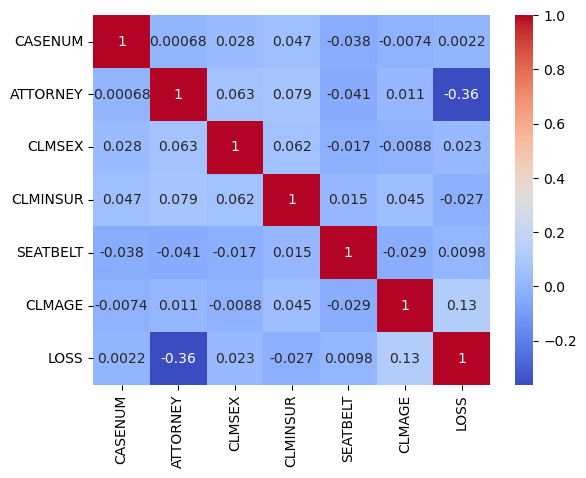

In [11]:
# Check the correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#### From the heatmap we can see that there is no strong positive correlation between the features.

# Feature Engineering

In [12]:
# Split the data into features and target variable
X = df.drop(columns=['CASENUM', 'ATTORNEY'])
y = df['ATTORNEY']

In [13]:
# Fit a decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Get feature importance scores
feature_importance = model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the result
print(feature_importance_df)

    Feature  Importance
4      LOSS    0.655797
3    CLMAGE    0.265039
0    CLMSEX    0.048970
1  CLMINSUR    0.020027
2  SEATBELT    0.010167


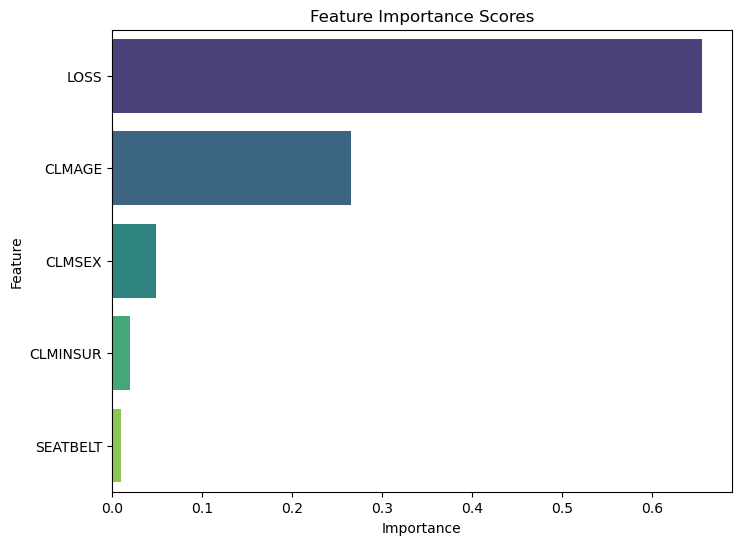

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance Scores')
plt.show()

#### We see that LOSS and CLMAGE are of more importance than other features. CLMSEX is also important to some extent. SEATBELT and CLMINSUR has the lowest importance.

# Model Building

In [15]:
# Split the data into features and target variable
X = df.drop(columns=['CASENUM', 'ATTORNEY'])
y = df['ATTORNEY']

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_rep)

Accuracy: 0.64
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.65      0.63       119
           1       0.67      0.63      0.65       136

    accuracy                           0.64       255
   macro avg       0.64      0.64      0.64       255
weighted avg       0.64      0.64      0.64       255



In [32]:
# Pruning the tree to increase the accuracy
pruned_tree = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=42)

# Fit the pruned tree on the training data
pruned_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_pruned = pruned_tree.predict(X_test)

# Evaluate accuracy of the pruned tree
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"Accuracy (Pruned Tree): {accuracy_pruned:.2f}")

Accuracy (Pruned Tree): 0.75


#### We got an accuracy of 64% and then I improved the model by pruning the tree. So I got an accuracy of 75% for the pruned tree.